In [9]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

In [10]:
df = pd.read_csv('predictive_maintenance.csv')

In [11]:
df

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure
...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,No Failure
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,No Failure
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,No Failure
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,No Failure


In [12]:
df.drop(['UDI' , 'Product ID' , 'Target'] , axis = 1 , inplace = True )

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Type                     10000 non-null  object 
 1   Air temperature [K]      10000 non-null  float64
 2   Process temperature [K]  10000 non-null  float64
 3   Rotational speed [rpm]   10000 non-null  int64  
 4   Torque [Nm]              10000 non-null  float64
 5   Tool wear [min]          10000 non-null  int64  
 6   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(2), object(2)
memory usage: 547.0+ KB


In [15]:
df.duplicated().sum()

np.int64(0)

In [16]:
df.describe()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,300.004930,310.005560,1538.776100,39.986910,107.951000
std,2.000259,1.483734,179.284096,9.968934,63.654147
min,295.300000,305.700000,1168.000000,3.800000,0.000000
25%,298.300000,308.800000,1423.000000,33.200000,53.000000
50%,300.100000,310.100000,1503.000000,40.100000,108.000000
75%,301.500000,311.100000,1612.000000,46.800000,162.000000
max,304.500000,313.800000,2886.000000,76.600000,253.000000


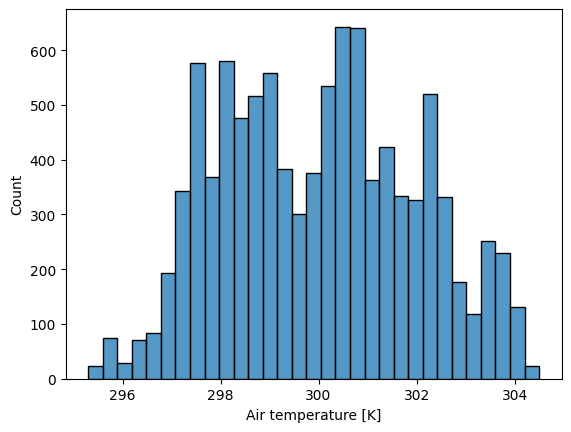

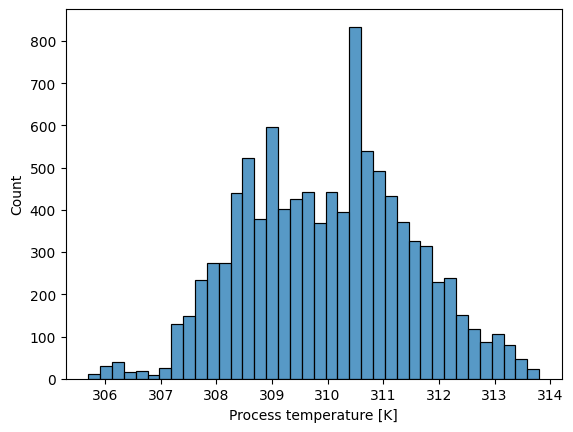

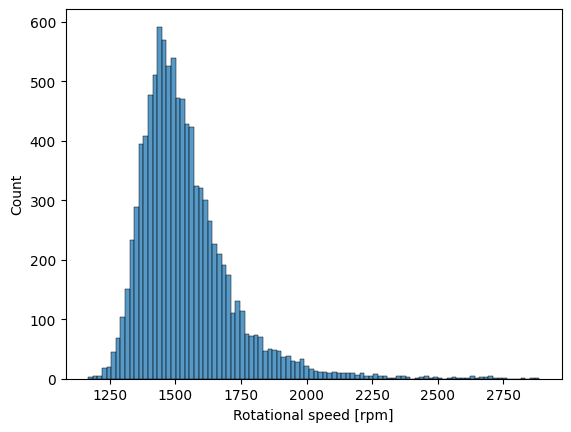

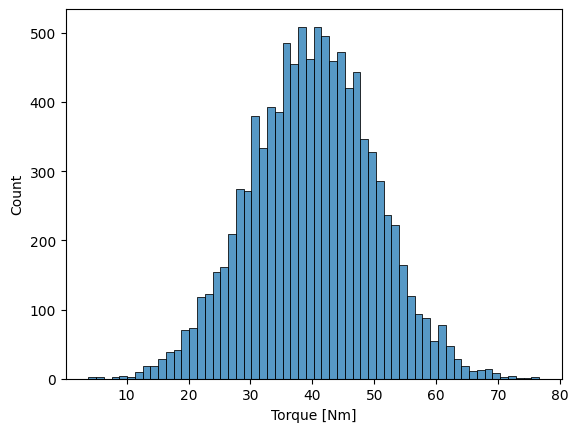

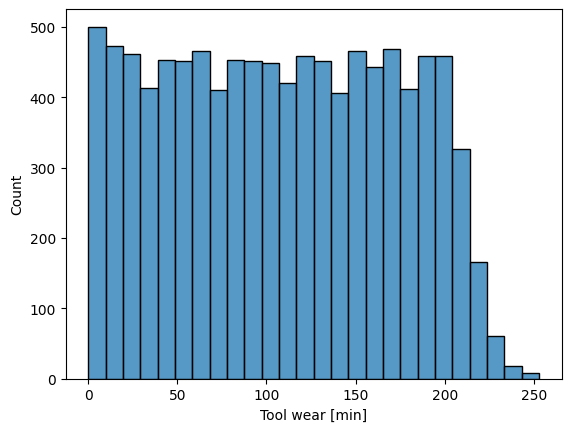

In [18]:
for col in df.select_dtypes('number').columns :
    plt.figure()
    sns.histplot(df[col])

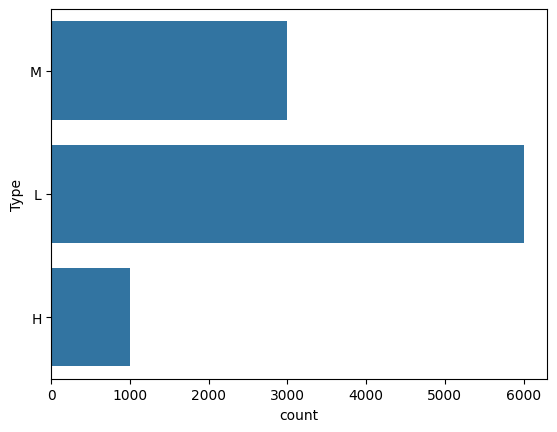

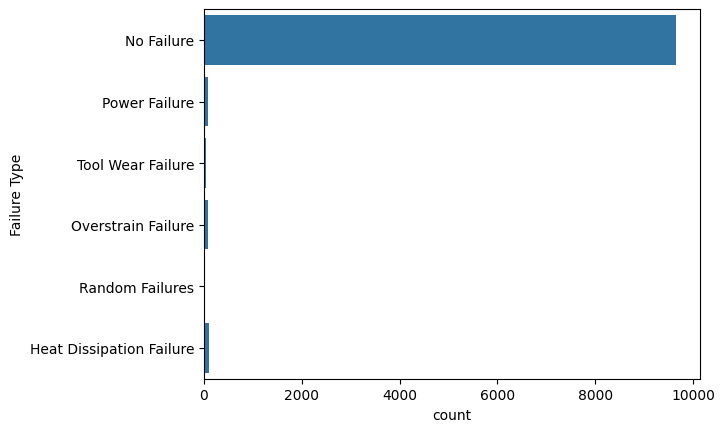

In [19]:
for col in df.select_dtypes('O').columns :
    plt.figure()
    sns.countplot(df[col])

In [20]:
df.columns 

Index(['Type', 'Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]',
       'Failure Type'],
      dtype='object')

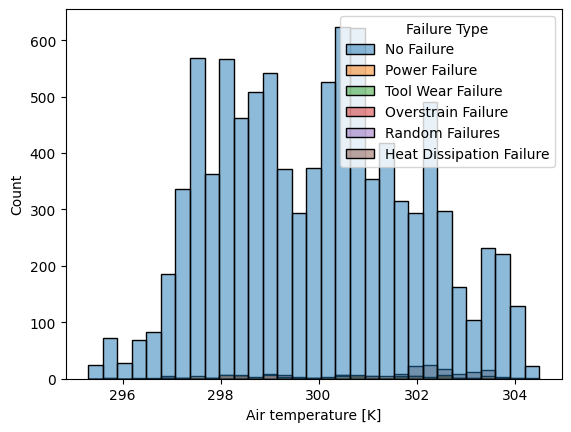

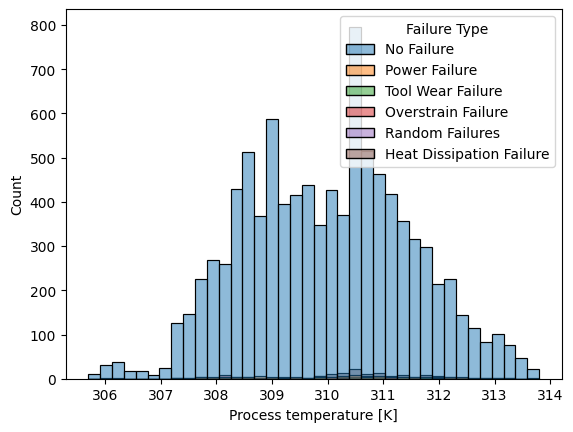

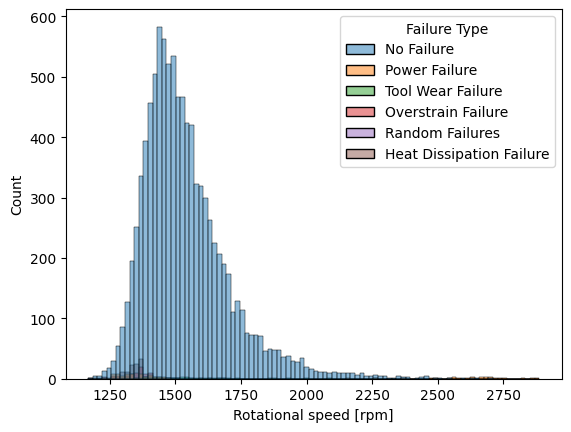

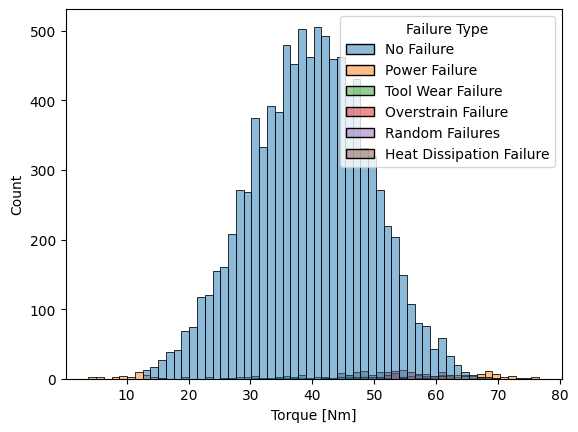

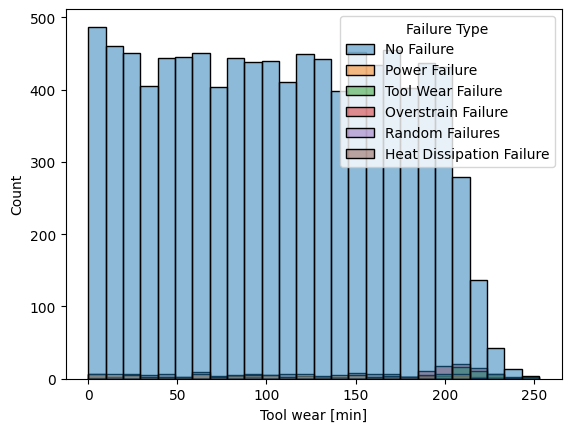

In [21]:
for col in df.select_dtypes('number').columns :
    plt.figure()
    sns.histplot(data = df , x = df[col] , hue = 'Failure Type')

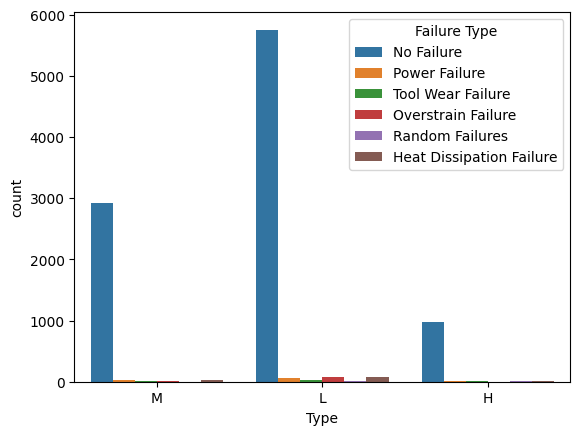

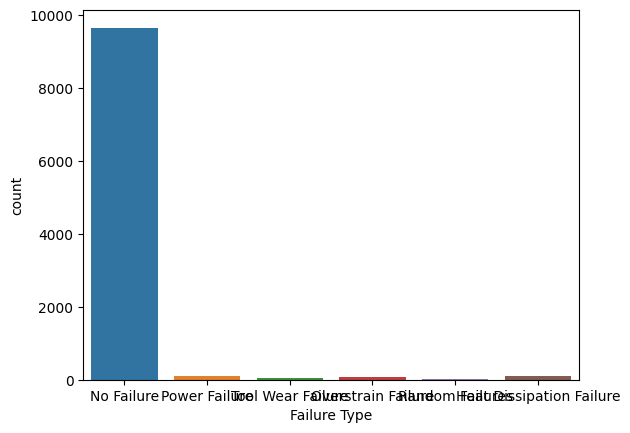

In [22]:
for col in df.select_dtypes('O').columns :
    plt.figure()
    sns.countplot(data =df , x = df[col] , hue = 'Failure Type')

<Axes: >

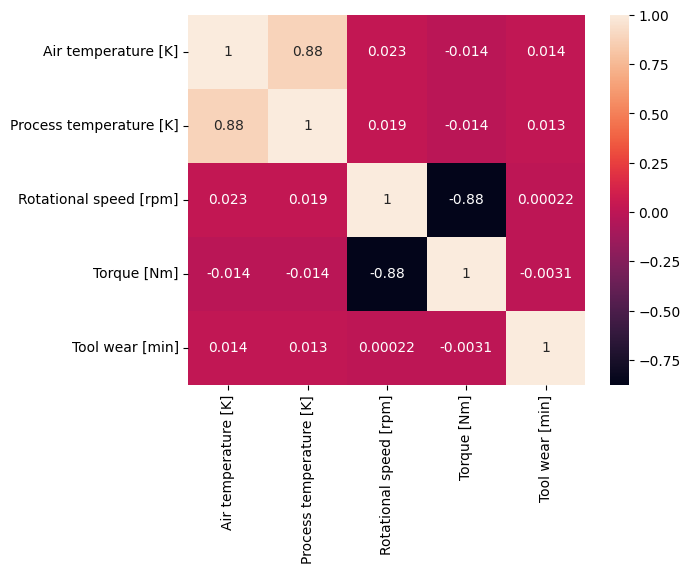

In [23]:
sns.heatmap(df.select_dtypes('number').corr() , annot=True )

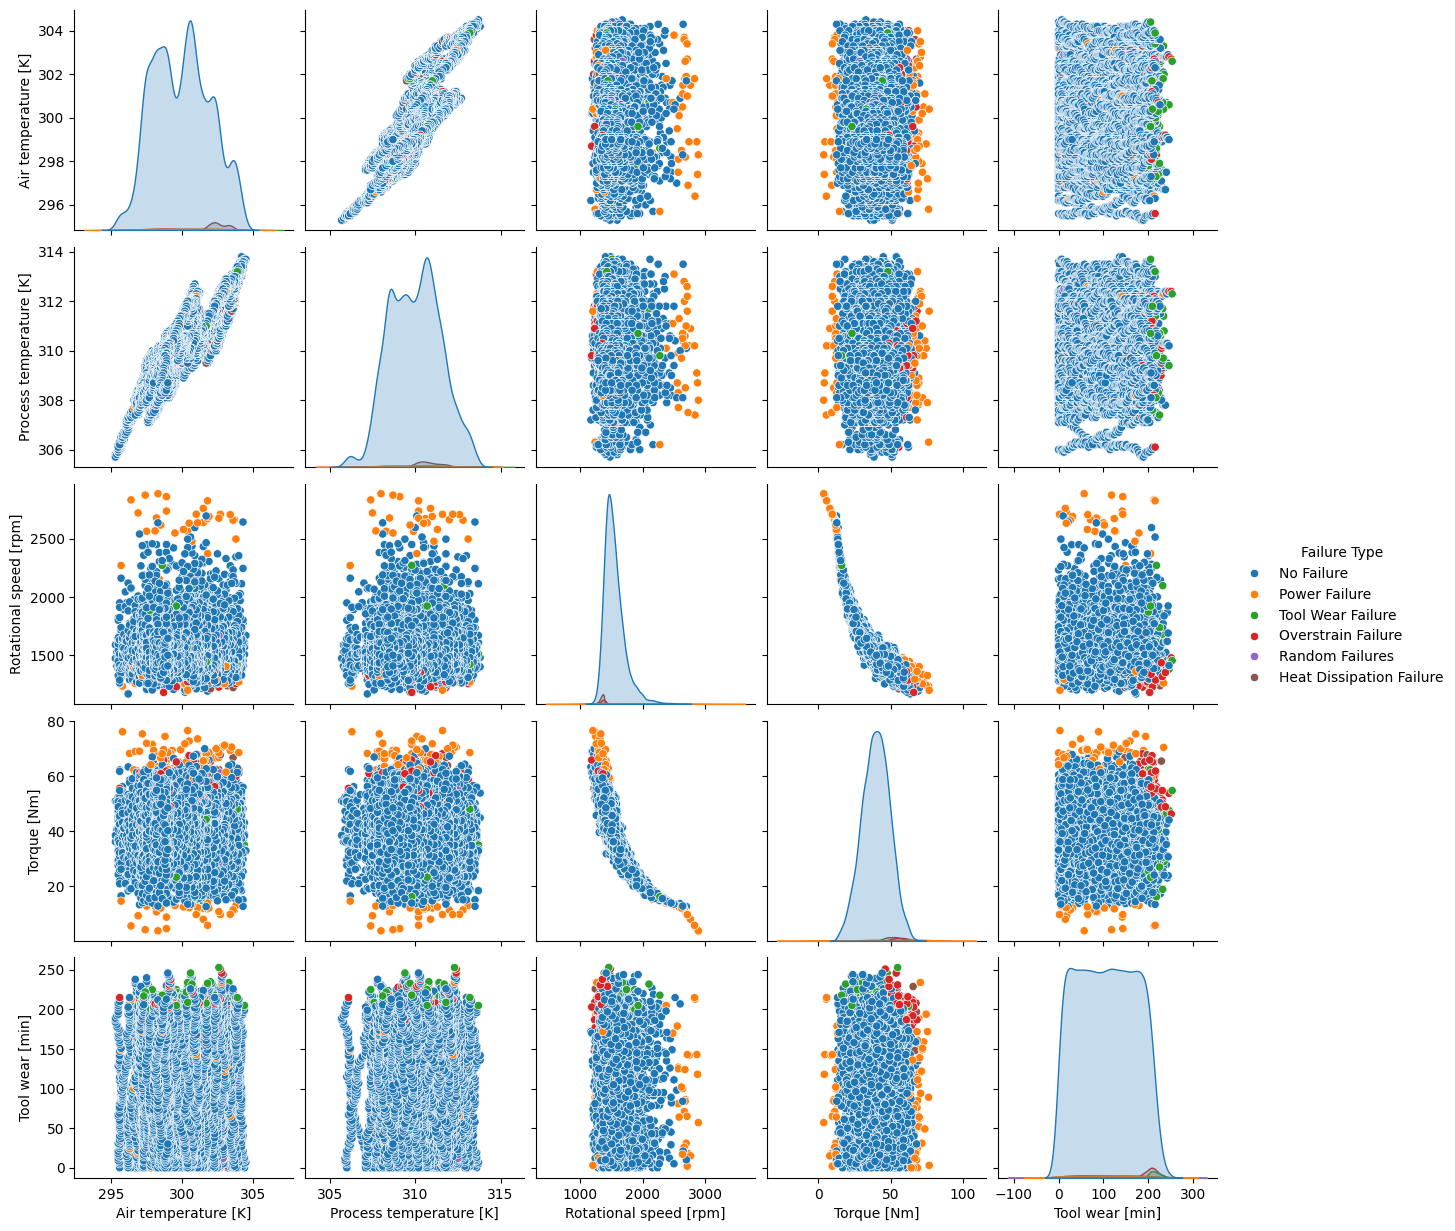

In [24]:
sns.pairplot(data = df , hue = 'Failure Type')

In [28]:
from sklearn.preprocessing import LabelEncoder , StandardScaler , PolynomialFeatures , OrdinalEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier , GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score , recall_score , precision_score , f1_score , confusion_matrix , ConfusionMatrixDisplay , RocCurveDisplay

from sklearn.model_selection import train_test_split

# from sklearn.pipeline import make_pipeline

from imblearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [36]:
y.value_counts(normalize = True )*100

1    96.52
0     1.12
3     0.95
2     0.78
5     0.45
4     0.18
Name: proportion, dtype: float64

In [37]:
le = LabelEncoder()

x , y = df[df.columns[:-1]] , pd.Series(le.fit_transform(df['Failure Type']))

x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.2 , random_state=0 , stratify=y)

In [32]:
le.fit_transform(df['Failure Type'])

array([1, 1, 1, ..., 1, 1, 1])

In [39]:
df['Type'].unique()

array(['M', 'L', 'H'], dtype=object)

In [40]:
transformer = ColumnTransformer(transformers=[
    ('ord_encoder' ,OrdinalEncoder(categories=[['L','M','H']]) , ['Type'])
] , remainder='passthrough')
transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('ord_encoder',
                                 OrdinalEncoder(categories=[['L', 'M', 'H']]),
                                 ['Type'])])

In [43]:
transformer.fit_transform(x)

array([[1.000e+00, 2.981e+02, 3.086e+02, 1.551e+03, 4.280e+01, 0.000e+00],
       [0.000e+00, 2.982e+02, 3.087e+02, 1.408e+03, 4.630e+01, 3.000e+00],
       [0.000e+00, 2.981e+02, 3.085e+02, 1.498e+03, 4.940e+01, 5.000e+00],
       ...,
       [1.000e+00, 2.990e+02, 3.086e+02, 1.645e+03, 3.340e+01, 2.200e+01],
       [2.000e+00, 2.990e+02, 3.087e+02, 1.408e+03, 4.850e+01, 2.500e+01],
       [1.000e+00, 2.990e+02, 3.087e+02, 1.500e+03, 4.020e+01, 3.000e+01]])

In [44]:
make_pipeline(transformer , StandardScaler() , LogisticRegression())

C:\Users\TarekZiad\anaconda3\envs\ml\Lib\site-packages\sklearn\compose\_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ord_encoder',
                                                  OrdinalEncoder(categories=[['L',
                                                                              'M',
                                                                              'H']]),
                                                  ['Type'])])),
                ('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [45]:
models = [
    LogisticRegression(),
    KNeighborsClassifier(),
    GaussianNB(),
    SVC(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    XGBClassifier()
]

In [52]:
y_train.value_counts()

1    7722
0      90
3      76
2      62
5      36
4      14
Name: count, dtype: int64

In [55]:
make_pipeline(transformer , StandardScaler() , 
                       RandomUnderSampler(sampling_strategy={1 : 1000}) ,
                       SMOTE(sampling_strategy={0 : 200 , 2 : 200 , 3 : 200 , 4 : 200 , 5 : 200}), LogisticRegression())

C:\Users\TarekZiad\anaconda3\envs\ml\Lib\site-packages\sklearn\compose\_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ord_encoder',
                                                  OrdinalEncoder(categories=[['L',
                                                                              'M',
                                                                              'H']]),
                                                  ['Type'])])),
                ('standardscaler', StandardScaler()),
                ('randomundersampler',
                 RandomUnderSampler(sampling_strategy={1: 1000})),
                ('smote',
                 SMOTE(sampling_strategy={0: 200, 2: 200, 3: 200, 4: 200,
                                          5: 200})),
                ('logisticregression', LogisticRegression())])

In [58]:
def Modeling(x_train , x_test ,y_train , y_test , model_name):
    
    # pipeline building
    pl = make_pipeline(transformer , StandardScaler() , 
                       RandomUnderSampler(sampling_strategy={1 : 1000}) ,
                       SMOTE(), model_name)

    # pipeline fit 
    pl.fit(x_train , y_train)

    # pipeline predict
    y_train_prd = pl.predict(x_train)
    y_test_prd = pl.predict(x_test)

    # pipeline evaluation accuracy
    print(f'Train Acc : {accuracy_score(y_train , y_train_prd)}')
    print(f'Test Acc : {accuracy_score(y_test , y_test_prd)}')

    # pipeline evaluation recall
    print(f'Train recall : {recall_score(y_train , y_train_prd , average='macro')}')
    print(f'Test recall : {recall_score(y_test , y_test_prd , average='macro')}')

    # pipeline evaluation precision
    print(f'Train precision : {precision_score(y_train , y_train_prd,average='macro')}')
    print(f'Test precision : {precision_score(y_test , y_test_prd,average='macro')}')

    # pipeline evaluation f1 score
    print(f'Train f1_score : {f1_score(y_train , y_train_prd,average='macro')}')
    print(f'Test f1_score : {f1_score(y_test , y_test_prd,average='macro')}')

    # confusion matrix 
    train_con_mat = ConfusionMatrixDisplay(confusion_matrix(y_train , y_train_prd))
    plt.figure()
    train_con_mat.plot()
    plt.title(f'Train -- {model_name}')
    plt.show()

    test_con_mat = ConfusionMatrixDisplay(confusion_matrix(y_test , y_test_prd))
    plt.figure()
    test_con_mat.plot()
    plt.title(f'Test -- {model_name}')
    plt.show()


Train Acc : 0.579875
Test Acc : 0.5935
Train recall : 0.8329896538725062
Test recall : 0.6989057181670354
Train precision : 0.32643725358837683
Test precision : 0.32769043361207334
Train f1_score : 0.36607218970521244
Test f1_score : 0.3676085890974916


<Figure size 640x480 with 0 Axes>

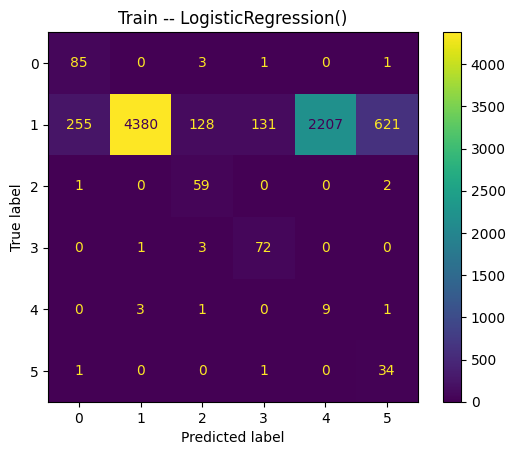

<Figure size 640x480 with 0 Axes>

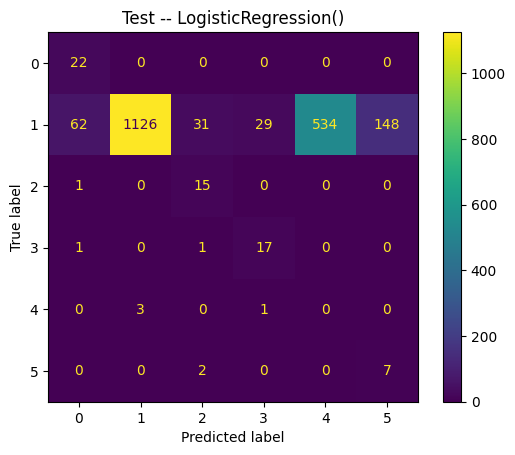

Train Acc : 0.7465
Test Acc : 0.739
Train recall : 0.9562289562289562
Test recall : 0.6803614673688986
Train precision : 0.3175625038482906
Test precision : 0.2798385556257667
Train f1_score : 0.3812475262557203
Test f1_score : 0.3254379589351692


<Figure size 640x480 with 0 Axes>

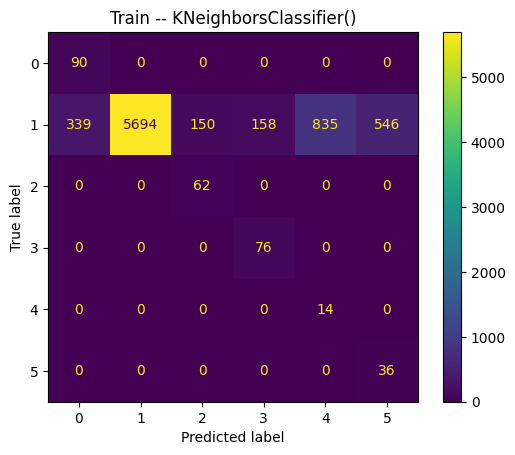

<Figure size 640x480 with 0 Axes>

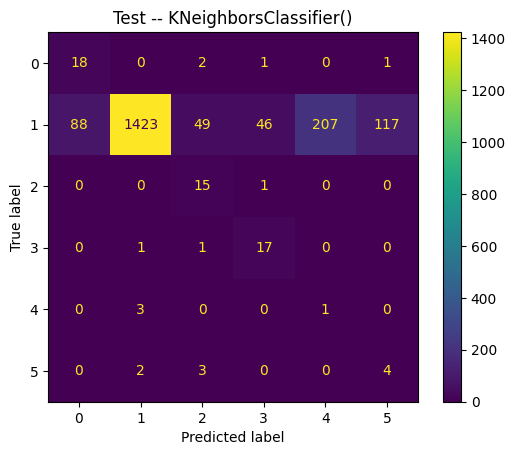

Train Acc : 0.430375
Test Acc : 0.438
Train recall : 0.7064156687388153
Test recall : 0.6616510930135827
Train precision : 0.25537458513885897
Test precision : 0.2563275921354471
Train f1_score : 0.24779722727604117
Test f1_score : 0.251768442939756


<Figure size 640x480 with 0 Axes>

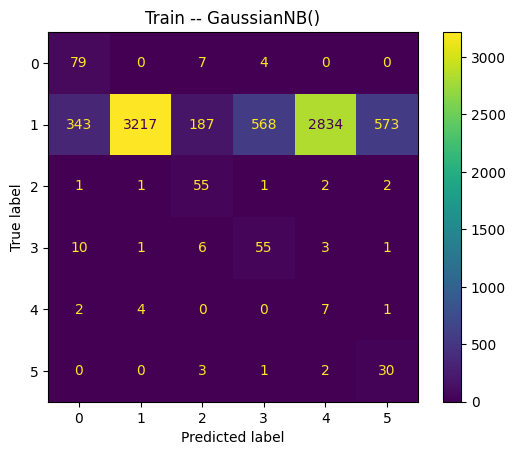

<Figure size 640x480 with 0 Axes>

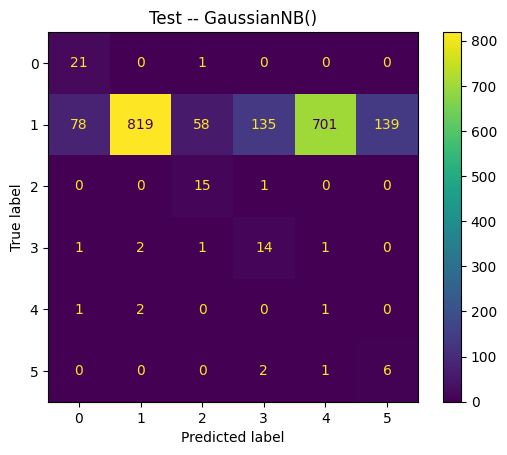

Train Acc : 0.715875
Test Acc : 0.7135
Train recall : 0.9345609985394931
Test recall : 0.7093007958872426
Train precision : 0.36009554201924604
Test precision : 0.33967042872198033
Train f1_score : 0.4234304758705075
Test f1_score : 0.3933491220826058


<Figure size 640x480 with 0 Axes>

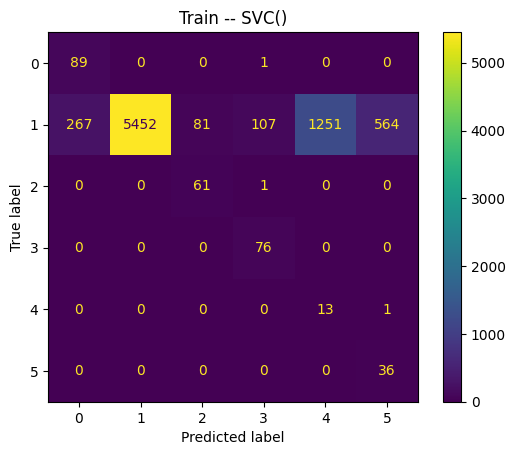

<Figure size 640x480 with 0 Axes>

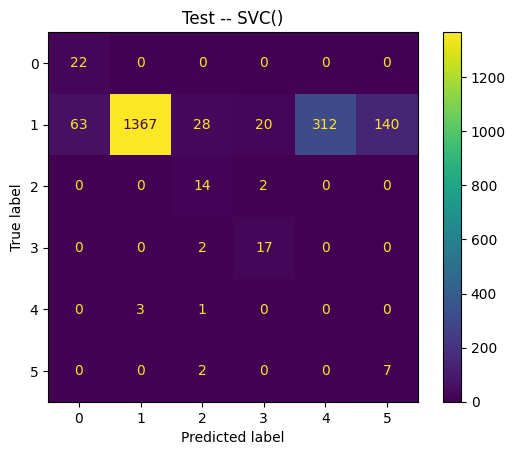

Train Acc : 0.88975
Test Acc : 0.854
Train recall : 0.980963480963481
Test recall : 0.7573273699177027
Train precision : 0.4555204160517254
Test precision : 0.38245828346380817
Train f1_score : 0.5465352880898774
Test f1_score : 0.4567832974838448


<Figure size 640x480 with 0 Axes>

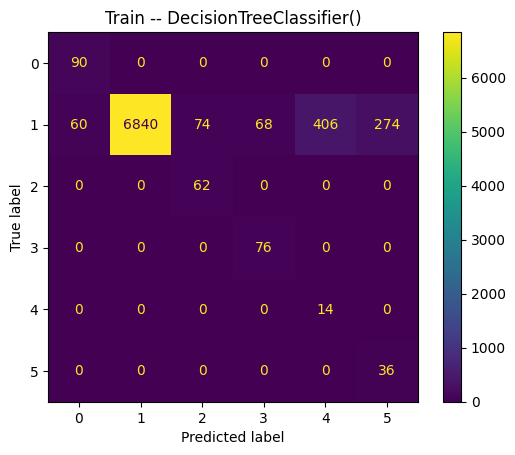

<Figure size 640x480 with 0 Axes>

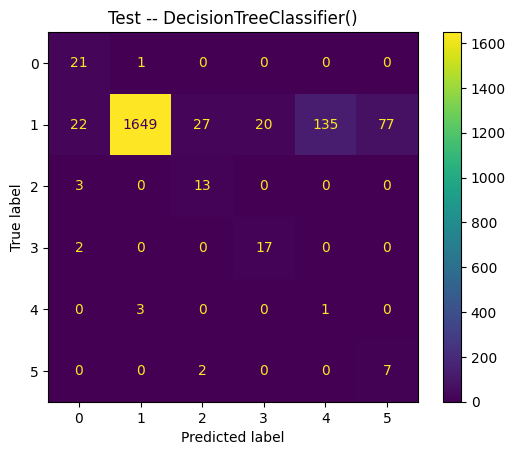

Train Acc : 0.917875
Test Acc : 0.9025
Train recall : 0.9858197358197357
Test recall : 0.7737770051207465
Train precision : 0.46038504812659037
Test precision : 0.4134048916327823
Train f1_score : 0.5601488793854682
Test f1_score : 0.49617577102300997


<Figure size 640x480 with 0 Axes>

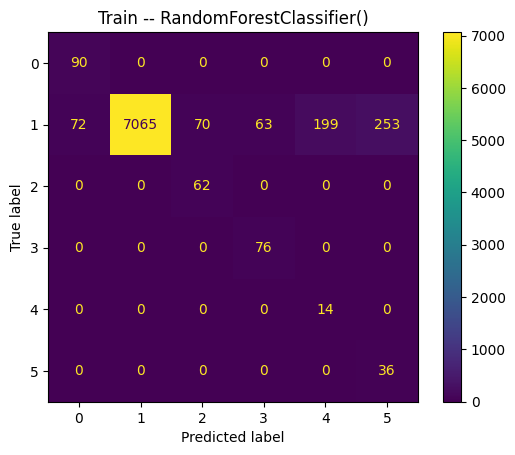

<Figure size 640x480 with 0 Axes>

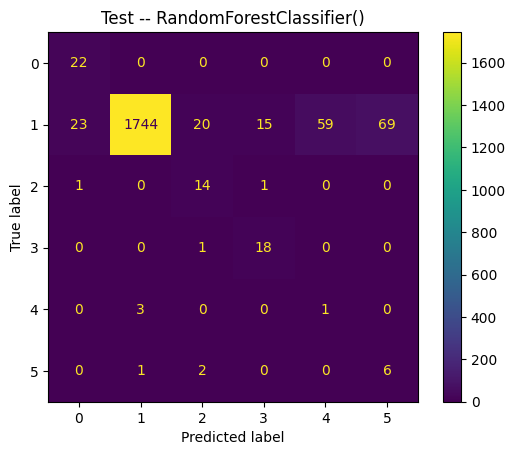

C:\Users\TarekZiad\anaconda3\envs\ml\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Train Acc : 0.026875
Test Acc : 0.0265
Train recall : 0.5563076603540668
Test recall : 0.5108615986700934
Train precision : 0.2667906291043804
Test precision : 0.2724229484289699
Train f1_score : 0.14756862579265947
Test f1_score : 0.12556252947143717


<Figure size 640x480 with 0 Axes>

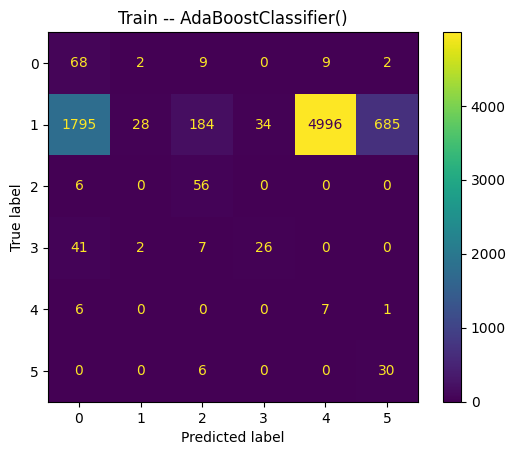

<Figure size 640x480 with 0 Axes>

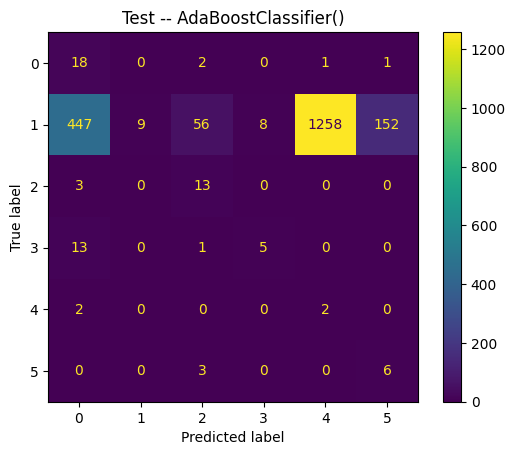

Train Acc : 0.8775
Test Acc : 0.872
Train recall : 0.9669651336318004
Test recall : 0.7956270389560545
Train precision : 0.47523890570452715
Test precision : 0.45737065952159156
Train f1_score : 0.5572386263088843
Test f1_score : 0.5289778882583737


<Figure size 640x480 with 0 Axes>

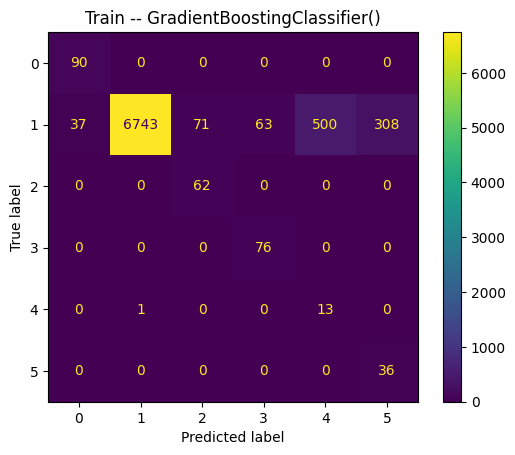

<Figure size 640x480 with 0 Axes>

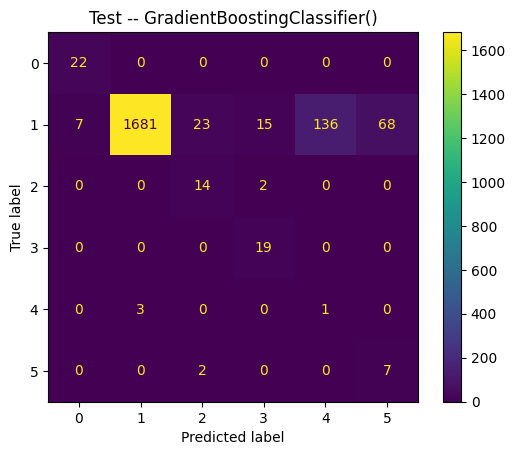

Train Acc : 0.923
Test Acc : 0.9155
Train recall : 0.9867046533713201
Test recall : 0.7615596814431012
Train precision : 0.5025248981790962
Test precision : 0.46248448578290574
Train f1_score : 0.5925803618890725
Test f1_score : 0.5356908729325238


<Figure size 640x480 with 0 Axes>

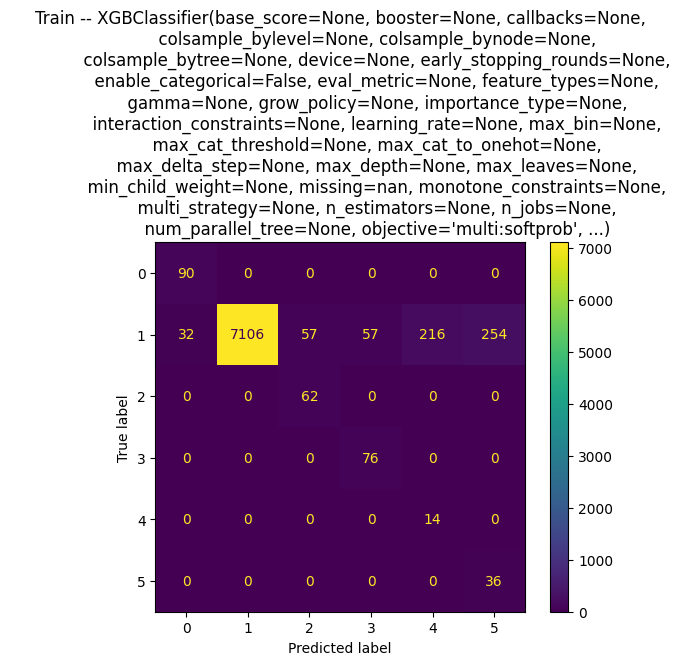

<Figure size 640x480 with 0 Axes>

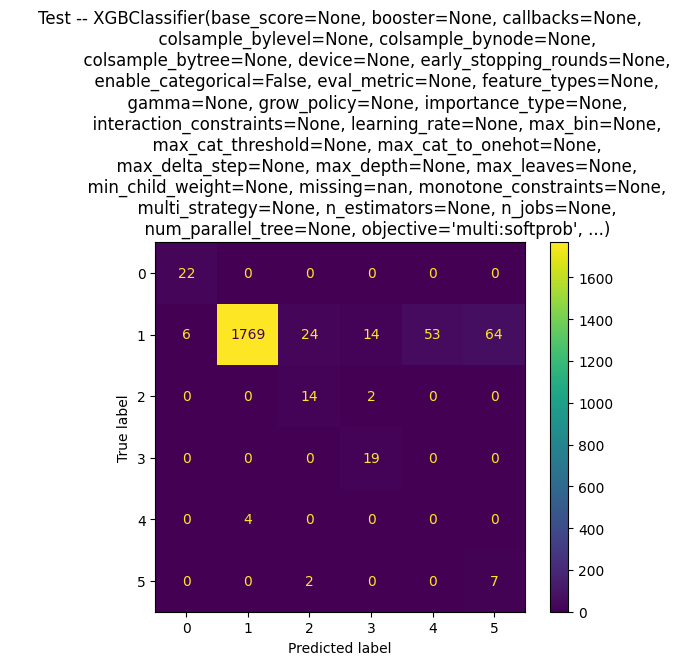

In [59]:
for model in models :

    Modeling(x_train , x_test ,y_train , y_test , model)

In [60]:
x_train

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
8375,M,298.8,309.6,1384,48.2,39
4534,L,302.4,310.2,1633,28.0,164
5662,L,302.2,311.5,1616,34.0,19
76,L,298.8,308.9,1461,47.9,206
8811,L,297.2,308.5,1574,35.8,95
...,...,...,...,...,...,...
3115,L,299.9,309.2,1658,34.8,16
1003,L,296.2,307.1,1444,46.7,194
4113,L,302.0,310.6,1325,55.3,192
6471,L,300.4,309.6,1523,38.5,124
